In [1]:
import numpy as np
import pandas as pan
from sklearn import tree
import matplotlib.pyplot as plot
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn import tree
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pan.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Check for null values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
# Drop any rows the contain missing values
# Drop Salary
df = df.dropna(axis=0)
# Check again for null values
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [5]:
# tree methods in sklearn library only allow for numerical features
features = df[['League', 'Division', 'NewLeague']]
print(features)
onehot_encoder = OneHotEncoder(drop = "first")
dummies = onehot_encoder.fit_transform(features).toarray()

    League Division NewLeague
1        N        W         N
2        A        W         A
3        N        E         N
4        N        E         N
5        A        W         A
..     ...      ...       ...
317      N        E         N
318      A        E         A
319      A        W         A
320      A        E         A
321      A        W         A

[263 rows x 3 columns]


In [6]:
dummies = pan.DataFrame(dummies, columns = onehot_encoder.get_feature_names_out())
dummies.head()

,League_N,Division_W,NewLeague_N
0,1.0,1.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,0.0,1.0,0.0


In [7]:
# Create a binary response
X = df.drop(columns = ['League', 'Division', 'NewLeague'])
X = pan.concat([X.reset_index(drop=True), dummies], axis=1)
print(X.shape)
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(df.Salary.values.reshape(-1,1))
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
X.head()

(263, 20)


C:\Users\kstre_3ikvnbf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1.0,1.0,1.0
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0.0,1.0,0.0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1.0,0.0,1.0
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1.0,0.0,1.0
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0.0,1.0,0.0


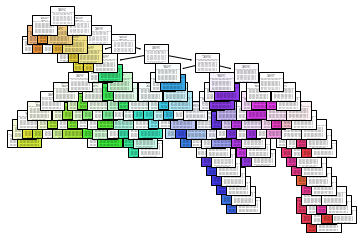

In [8]:
# Grow a tree
clf = tree.DecisionTreeClassifier(min_samples_split = 5)
clf = clf.fit(X, y)
plot.figure()
plot_tree(clf, filled=True)
plot.show()

In [9]:
# Create training and test sets -->
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
print(alphas)

[0.         0.00763359 0.00763359 0.00763359 0.00763359 0.00763359
 0.00763359 0.00763359 0.01049618 0.01068702 0.01081425 0.01218438
 0.01220885 0.01221374 0.01221374 0.01235914 0.0124894  0.0134701
 0.01374046 0.01485626 0.014922   0.01540407 0.01559442 0.02035623
 0.02059006 0.02099237 0.02144422 0.02775028]


In [10]:
from sklearn.metrics import accuracy_score
test_errors = []
train_errors = []
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = alpha)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_errors.append(1-accuracy_score(y_train, y_train_pred))
    test_errors.append(1-accuracy_score(y_test, y_test_pred))

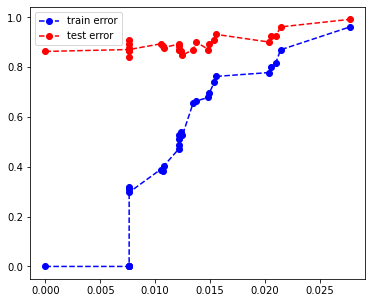

In [11]:
plot.figure(figsize=(6, 5))

plot.plot(alphas, train_errors,  '--bo', label='train error')
plot.plot(alphas, test_errors,  '--ro', label='test error')
plot.legend()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(X, y)
alphas = path.ccp_alphas

In [13]:
# Do cross validation
from sklearn.model_selection import KFold
CVsplitter = KFold(n_splits = 10)
val_errors = []
for alpha in alphas:
    regressor = DecisionTreeRegressor(ccp_alpha = alpha)
    val_errors.append(-1 * np.mean(cross_val_score(regressor, X, y, cv = CVsplitter, scoring='neg_mean_squared_error')))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


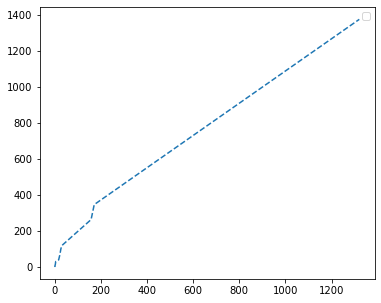

In [14]:
plot.figure(figsize=(6, 5))
plot.plot(alphas, val_errors,  '--')
plot.legend()

In [35]:
test_pred = clf.predict(X_test)
mse = mean_absolute_error(test_pred, y_test)
mse

59.196969696969695

In [15]:
# b)
# Create a binary response
X = df.drop(columns = ['League', 'Division', 'NewLeague'])
X = pan.concat([X.reset_index(drop=True), dummies], axis=1)
print(X.shape)
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(df.Salary.values.reshape(-1,1))
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

(263, 20)


C:\Users\kstre_3ikvnbf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Verify Using LOOCV
cv = LeaveOneOut()
scores = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Average Absolute Error: ")
mean(absolute(scores))

Average Absolute Error: 


141.38931297709922

In [17]:
print("Root Mean Squared Error: ")
sqrt(mean(absolute(scores)))

Root Mean Squared Error: 


11.890723820571194

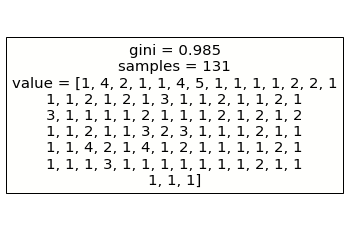

In [18]:
clf_pruned = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
plot.figure()
plot_tree(clf, filled=True)
plot.show()

In [19]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.045454545454545456
0.15267175572519084


In [20]:
# Verify Using LOOCV
cv = LeaveOneOut()
scores = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Average Absolute Error: ")
mean(absolute(scores))

Average Absolute Error: 


134.27480916030535

In [21]:
print("Root Mean Squared Error: ")
sqrt(mean(absolute(scores)))

Root Mean Squared Error: 


11.587700771089377

In [34]:
mse = mean_absolute_error(preds_pruned, y_test)
mse

22.234848484848484

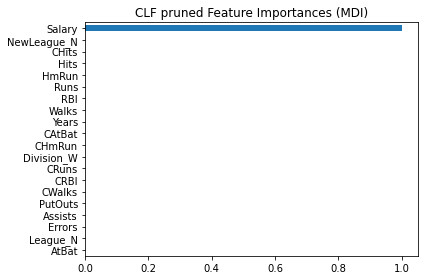

In [22]:
### get feature importance
feature_names = X_train.columns.values.tolist()
mdi_importances = pan.Series(
    clf_pruned.feature_importances_, index=feature_names
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("CLF pruned Feature Importances (MDI)")
ax.figure.tight_layout()

In [23]:
# The pruned tree was a better fit because it had a lower error

In [24]:
# c)
from sklearn.ensemble import BaggingClassifier
bm = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=1000, max_samples=0.8, bootstrap=True, oob_score=True, random_state=0)
bm.fit(X_train, y_train)
test_pred = bm.predict(X_test)
mse = mean_absolute_error(test_pred, y_test)
mse
# No importatnt predictors

7.090909090909091

In [25]:
# d)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf = 10, n_estimators= 1000, max_features=.3,  random_state=0)
rf.fit(X_train, y_train)
test_pred = rf.predict(X_test)
mse = mean_absolute_error(test_pred, y_test)
mse

11.522727272727273

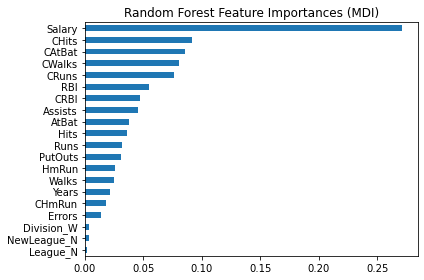

In [26]:
### get feature importance
feature_names = X_train.columns.values.tolist()
mdi_importances = pan.Series(
    rf.feature_importances_, index=feature_names
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
# CAtBat, CHits, CRuns, Cwalks, CRBI, and PutOuts are the most important predictors

In [30]:
# e)
boost = AdaBoostClassifier(n_estimators = 1000, learning_rate = 0.1).fit(X_train, y_train)
test_pred = boost.predict(X_test)
mse = mean_absolute_error(test_pred, y_test)
mse

10.878787878787879

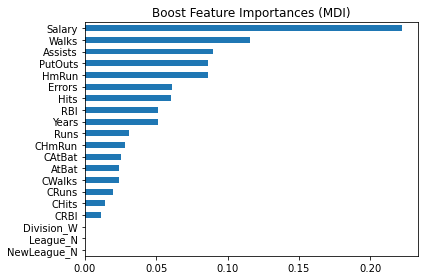

In [32]:
### get feature importance
feature_names = X_train.columns.values.tolist()
mdi_importances = pan.Series(
    boost.feature_importances_, index=feature_names
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Boost Feature Importances (MDI)")
ax.figure.tight_layout()
# Walks, Assists, PutOuts, HmRun, Errors, Hits, RBI, and Years are the most important predictors

In [ ]:
# I would reccommend the bagging approach, due to it having the lowest test error